# 数据增强

数据增强是数据科学体系中常用的一种增加数据量的技术，它通过添加略微修改的现有数据、或从现有数据中重新合成新数据来增加数据量。

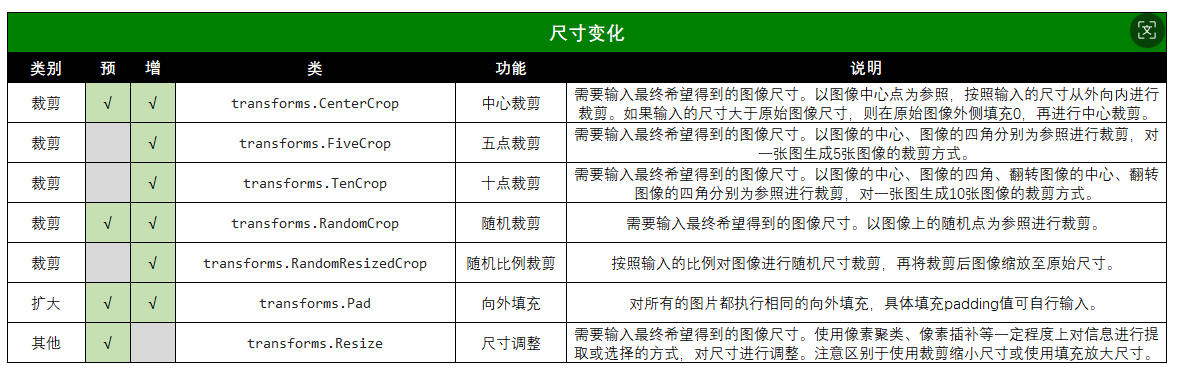

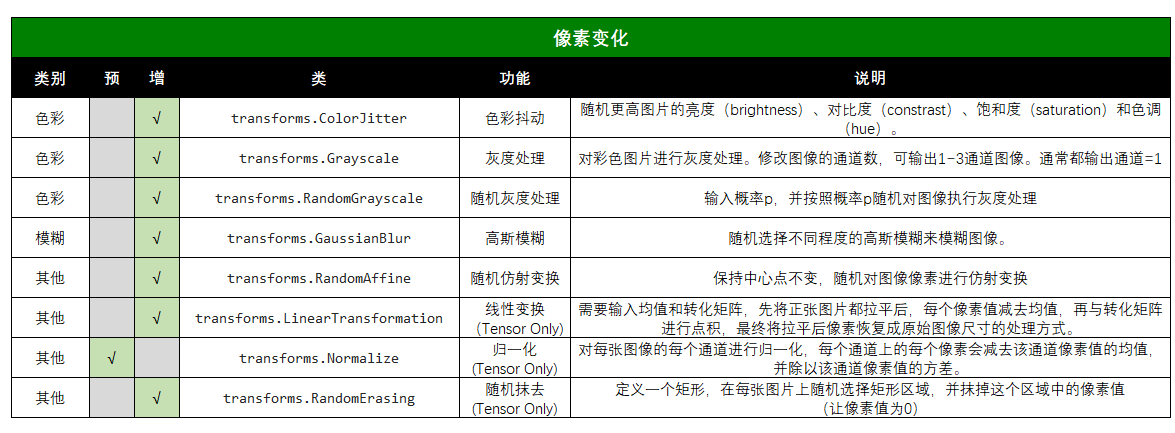

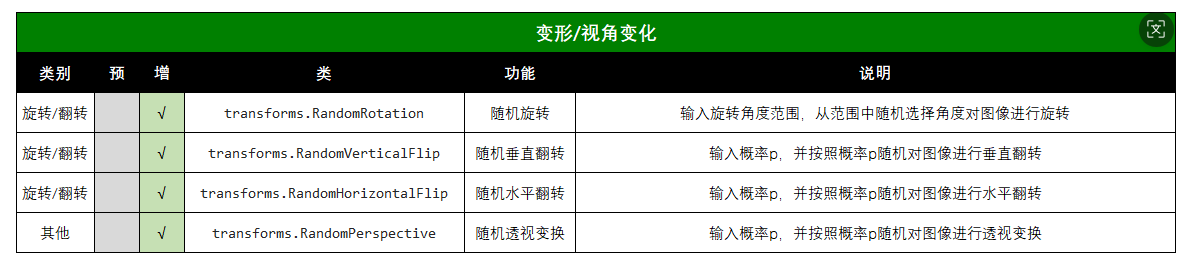

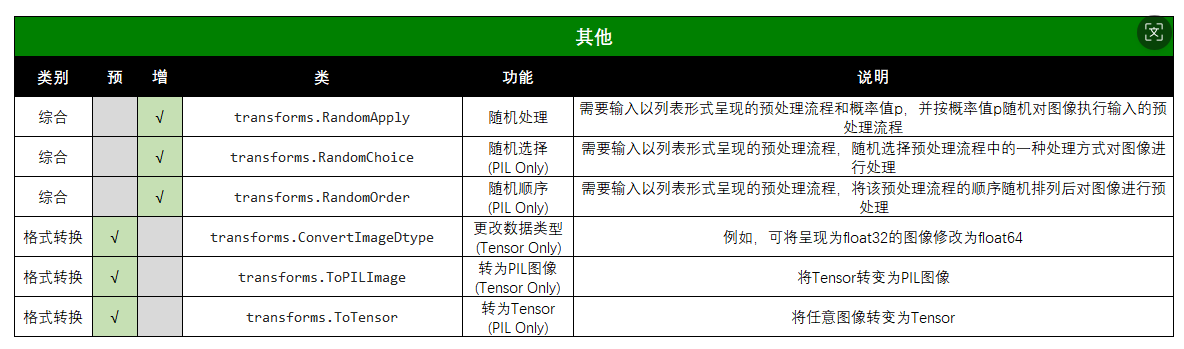

In [217]:
import torchvision
from torchvision import transforms

# 修正路径格式和类名
data_val = torchvision.datasets.LSUN(
    root=r"E:\datasets\lsun-master\data",  # 原始字符串处理路径
    classes=["church_outdoor_train", "classroom_val"],  # 正确的类名格式
    #transform=transforms.ToTensor()
)

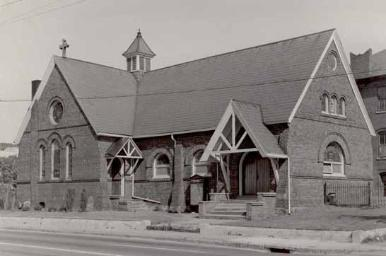

In [218]:
data_val[251][0]

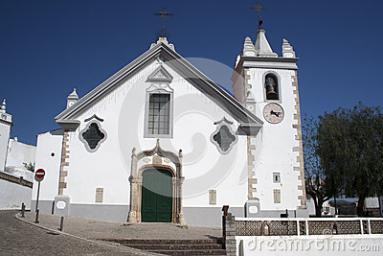

In [219]:
data_val[250][0]

最常用的是 transforms.RandomCrop() ，常常被放在transforms.Resize() 后面替代中心裁剪。

In [220]:
transform_aug = transforms.Compose([transforms.Resize(256)#将输入图像的短边调整为 256 像素
                                    ,transforms.RandomCrop(size=(224))#从调整后的图像中随机裁剪出 224×224 像素的区域，增加数据随机性
                                    ,transforms.RandomHorizontalFlip(p=1)#以 100% 的概率（p=1）对图像进行水平翻转，相当于强制水平镜像处理
                                   #,transforms.ToTensor()
                                   ])


In [221]:
data_val_aug= torchvision.datasets.LSUN(
    root=r"E:\datasets\lsun-master\data",  # 原始字符串处理路径
    classes=["church_outdoor_train", "classroom_val"],  # 正确的类名格式
    transform=transform_aug#应用预定义的数据增强操作（如旋转、裁剪等），通过transform_aug变量传入
)

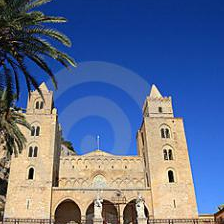

In [222]:
data_val_aug[270][0]

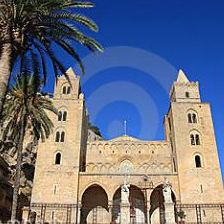

In [223]:
data_val_aug[270][0]

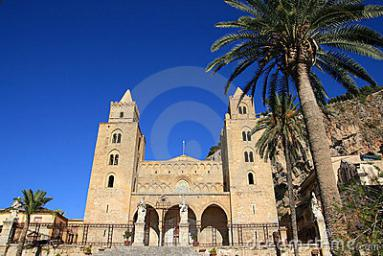

In [224]:
data_val[270][0]

In [225]:
#定义transform
transform = transforms.Compose([transforms.Resize(256) #先对尺寸进行操作
                                ,transforms.RandomCrop(size=(224))
                                ,transforms.RandomHorizontalFlip(p=1) #再进行翻转、旋转等操作
                                ,transforms.RandomRotation(degrees=(-70,70))
                                ,transforms.ToTensor() #对图片都处理完成后，转换为Tensor
                                ,transforms.Normalize(mean=[0.485, 0.456, 0.406] #最后进行归一化
                                                      ,std=[0.229, 0.224, 0.225])])

In [226]:
data_train= torchvision.datasets.LSUN(
    root=r"E:\datasets\lsun-master\data",  # 原始字符串处理路径
    classes=["church_outdoor_train", "classroom_val"],  # 正确的类名格式
    transform=transform)

In [227]:
data_train[0][0].shape

torch.Size([3, 224, 224])